In [1]:
### tools
suppressMessages(suppressWarnings(library(tidyverse)))
suppressMessages(suppressWarnings(library(MPSK)))
library("rjson")

### plots
suppressMessages(suppressWarnings(library(gridExtra)))
suppressMessages(suppressWarnings(library(RColorBrewer)))

### Constants
DAT_DIR = "/data/clintko/SMPK"
OUT_DIR = "/data/clintko/SMPK"

In [2]:
#markers = c('FSC_A', 'SSC_A', 'CD3', 'CD4', 'CD8', 'IFN+IL2')

C = read_delim(file.path(DAT_DIR, 'C.txt'),     delim="\t", col_names=FALSE, col_types=c(col_integer()))
C = C$X1

Y = read_delim(file.path(DAT_DIR, 'Y_raw.txt'), delim="\t", col_names=FALSE, col_types=list(
    col_double(), col_double(), col_double(), col_double(), col_double(), 
    col_double(), col_double(), col_double(), col_double(), col_double()))
Y = scale(Y)

pmc = fromJSON(file = "prior01.json")

In [3]:
print(nrow(Y))
cat("========\n")
print(table(C))
cat("========\n")
pmc

[1] 180000
C
    1     2     3     4     5     6     7     8     9    10    11    12    13 
10000 10000 10000 10000 10000 10000 10000 10000 10000 10000 10000 10000 10000 
   14    15    16    17    18 
10000 10000 10000 10000 10000 


$zeta
[1] 1

$npart
[1] 10

$nburn
[1] 20

$nsave
[1] 50

$nskip
[1] 1

$ndisplay
[1] 1

```
mat = cbind(C, Y)
mat = mat %>% as.data.frame %>% group_by(C) %>% sample_n(1000)
mat = mat %>% as.data.frame %>% filter(C %in% c(1,2,3,4,5))

C_sub = mat$C
Y_sub = mat[,-1]
mat %>% group_by(C) %>% summarize(count=n())
```

```
resMPSK = mpsk(Y, C, pmc=pmc)
resRelab = relabelChain(resMPSK)
resCalib = calibrate(resRelab)
chainSum = summarizeChain(resRelab)
```

In [4]:
print(pmc)
tt1 <- Sys.time()

cat("\n===== Run MPSK =====\n")
resMPSK = mpsk(Y, C, pmc=pmc)
tt2 <- Sys.time()
print(tt2 - tt1)

cat("\n===== Relabel =====\n")
resRelab = relabelChain(resMPSK)
tt3 <- Sys.time()
print(tt3 - tt2)

cat("\n===== Calibrate =====\n")
resCalib = calibrate(resRelab)
tt4 <- Sys.time()
print(tt4 - tt2)

cat("\n===== Summarize =====\n")
chainSum = summarizeChain(resRelab)
tt5 <- Sys.time()
print(tt5 - tt4)

$zeta
[1] 1

$npart
[1] 10

$nburn
[1] 20

$nsave
[1] 50

$nskip
[1] 1

$ndisplay
[1] 1


===== Run MPSK =====
initializing all particles...
Done
Iteration: 1 of 70
Iteration: 2 of 70
Iteration: 3 of 70
Merged clusters (iteration 3)
Iteration: 4 of 70
Iteration: 5 of 70
Iteration: 6 of 70
Merged clusters (iteration 6)
Iteration: 7 of 70
Iteration: 8 of 70
Iteration: 9 of 70
Iteration: 10 of 70
Merged clusters (iteration 10)
Iteration: 11 of 70
Iteration: 12 of 70
Iteration: 13 of 70
Iteration: 14 of 70
Iteration: 15 of 70
Iteration: 16 of 70
Iteration: 17 of 70
Iteration: 18 of 70
Iteration: 19 of 70
Iteration: 20 of 70
Iteration: 21 of 70
Iteration: 22 of 70
Iteration: 23 of 70
Iteration: 24 of 70
Iteration: 25 of 70
Iteration: 26 of 70
Iteration: 27 of 70
Iteration: 28 of 70
Iteration: 29 of 70
Iteration: 30 of 70
Iteration: 31 of 70
Iteration: 32 of 70
Iteration: 33 of 70
Iteration: 34 of 70
Iteration: 35 of 70
Iteration: 36 of 70
Iteration: 37 of 70
Iteration: 38 of 70
Iteration: 3

In [8]:
weights  = resRelab$chain$W
n_sample = dim(weights)[1]
n_save   = dim(weights)[3]
kIdx     = unique(chainSum$t)

#idx = str_pad(1:n_save, 2, pad="0")
#ids_iter = paste0("iter", idx)
ids_iter = str_pad(1:n_save, 2, pad="0")
ids_sam  = 1:n_sample

cat("==========================\n")
print(n_sample)
print(n_save)
cat("==========================\n")
print(ids_sam)
cat("==========================\n")
print(ids_iter)
cat("==========================\n")
print(length(kIdx) * n_sample)

[1] 18
[1] 50
 [1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18
 [1] "01" "02" "03" "04" "05" "06" "07" "08" "09" "10" "11" "12" "13" "14" "15"
[16] "16" "17" "18" "19" "20" "21" "22" "23" "24" "25" "26" "27" "28" "29" "30"
[31] "31" "32" "33" "34" "35" "36" "37" "38" "39" "40" "41" "42" "43" "44" "45"
[46] "46" "47" "48" "49" "50"
[1] 144


In [14]:
lst = lapply(kIdx, function(k){
    w = weights[,k,]
    w = cbind(k, w)
    w = cbind(ids_sam, w)
    colnames(w) = c("sample", "kIdx", ids_iter)
    return(w)
})

df = do.call(rbind, lst) %>% as.data.frame
print(nrow(df))

df = df %>% gather(iteration, value, -sample, -kIdx)
print(nrow(df))

df = df %>% mutate(sample    = str_pad(sample, 2, pad="0"))
df = df %>% mutate(kIdx      = paste0("Particle ", kIdx))
df = df %>% mutate(iteration = as.integer(iteration))

[1] 144
[1] 7200


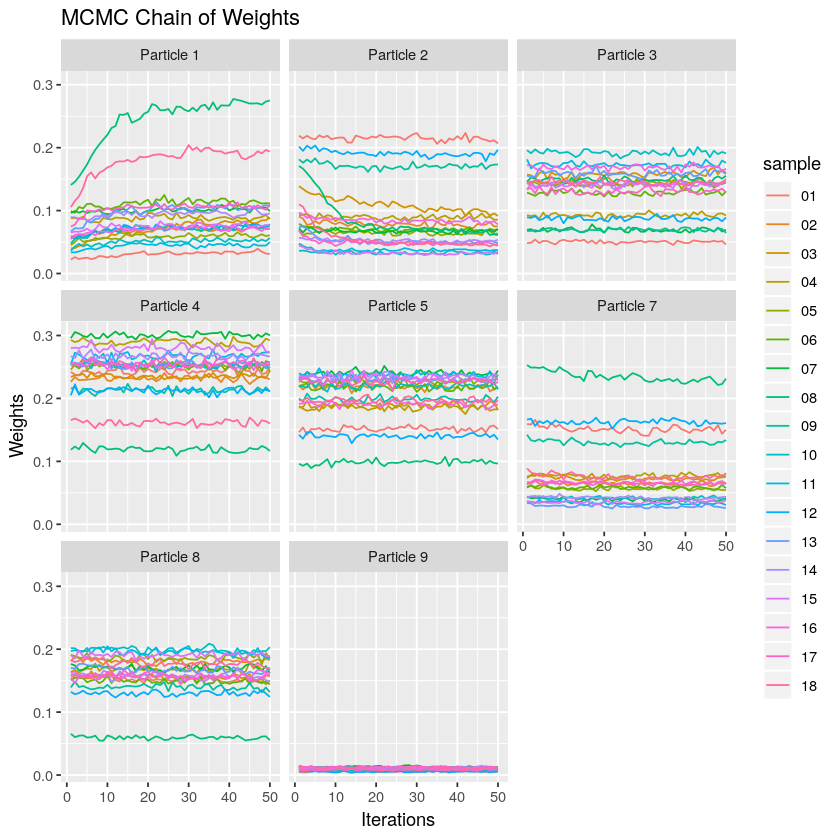

In [16]:
gp = df %>%
    ggplot(aes(x=iteration, y=value, color=sample, group=sample)) +
    geom_line() + 
    labs(x="Iterations", y="Weights", title="MCMC Chain of Weights") +
    facet_wrap(~kIdx)
print(gp)